# [Машинное обучение на ФБМФ](https://thetahat.ru/courses/bm-2025-spr)
## Домашнее задание 6

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  30 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash;  30 баллов
-----

In [2]:
# Bot check

# HW_ID: bt_ml_hw6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [199]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from tqdm.notebook import tqdm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge

*Напоминаем, что во всех заданиях нашего курса, да и в реальной жизни, если вы получаете какие-то результаты, то надо сделать вывод!*

### Задача 1


В этой задаче вам предлагается исследовать зависимость качества предсказаний модели случайного леса в зависимости от различных гиперпараметров на примере задаче регрессии. Будем использовать класс `RandomForestRegressor` библиотеки `sklearn`.

В качестве данных возьмём следующий датасет: https://archive.ics.uci.edu/dataset/1/abalone. Будем предсказывать возраст моллюсков.

*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для отслеживания времени работы можно использовать `tqdm` в циклах.

#### Загрузка и предобработка данных:

In [25]:
data = pd.read_csv('abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 
                                          'Shucked weight', 'Viscera weight', 'Shell weight',
                                          'Rings'])
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Уберем категориальный признак:

In [28]:
data = data.drop('Sex', axis=1)

In [30]:
X = data.drop('Rings', axis=1)
y = data['Rings'] + 1.5

Разбейте данные на обучающую выборку и на валидацию, выделив на валидацию 25% данных.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Посмотрите, как изменяется качество леса в зависимости от выбранных параметров. Для этого постройте графики зависимости MSE на тестовой выборке от количества деревьев (от 1 до 100) и от максимальной глубины дерева (от 3 до 25). Когда варьируете один из параметров, в качестве другого берите значение по умолчанию. Для того, чтобы исследовать зависимость от количества деревьев, обучите лес **один** раз и посчитайте предсказания каждого отдельного дерева в лесу. После этого используйте усреднение первых $k$ предсказаний в качестве ответа для $k$ деревьев. 

In [61]:
n_estimators_array = np.arange(1, 100, 1)
mses = []
for n_estimator in n_estimators_array:
    rf_clf = RandomForestRegressor(n_estimators=n_estimator, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    mses.append(MSE(y_pred, y_test))

In [55]:
depths = np.arange(3, 25, 1)
mses_depth = []
for depth in depths:
    rf_clf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=depth)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    mses_depth.append(MSE(y_pred, y_test))

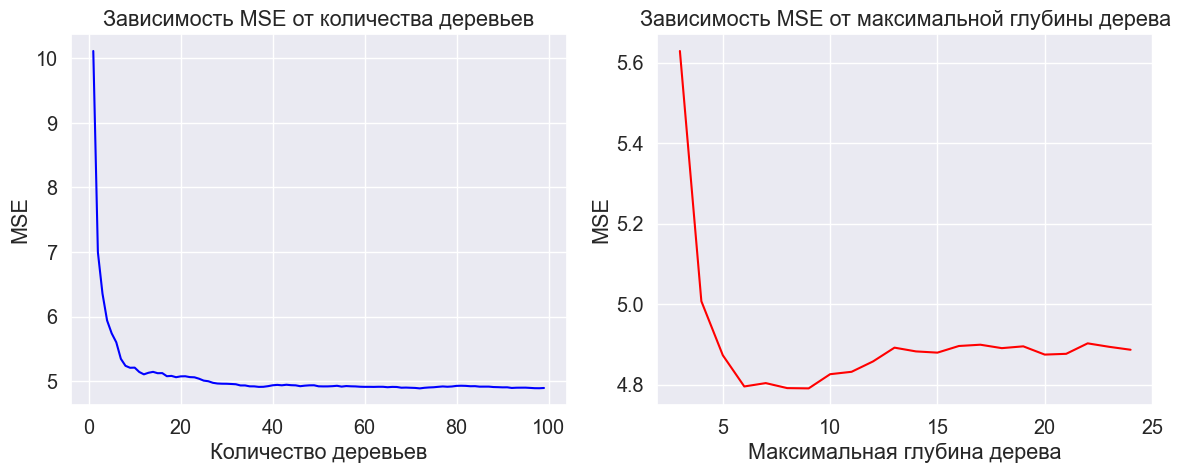

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(n_estimators_array, mses, color='blue')
ax1.set_title('Зависимость MSE от количества деревьев')
ax1.set_xlabel('Количество деревьев')
ax1.set_ylabel('MSE')
ax1.grid(True)

ax2.plot(depths, mses_depth, color='red')
ax2.set_title('Зависимость MSE от максимальной глубины дерева')
ax2.set_xlabel('Максимальная глубина дерева')
ax2.set_ylabel('MSE')
ax2.grid(True)

plt.tight_layout()
plt.show()

Основываясь на полученных графиках, ответьте на следующие вопросы.

1. Какие закономерности можно увидеть на построенных графиках? Почему графики получились такими?

2. Как изменяется качество предсказаний с увеличением исследуемых параметров, когда эти параметры уже достаточно большие.

3. В предыдущем задании вы на практике убедились, что решающее дерево начинает переобучаться при достаточно больших значениях максимальной глубины. Справедливо ли это утверждение для случайного леса? Поясните свой ответ, опираясь на своё знание статистики.

**Ответ:**
1. При увеличении количества деревьев в лесе, модель становится более точной, так как усреднение предсказаний множества деревьев снижает дисперсию ошибки. Затем значение MSE выходит на плато, так как начиная с какого-то момента улучшить дерево не получится. В случае же максимальной глубины дерева - видим наличие минимума ошибки, после которого модель может перейти в переобучение и MSE снова увеличится.

2. Как уже сказано - значения выходят на плато, но в случае глубины деревьев мы ограничены количеством признаков и если достигается максимальное значение, то каждый лист - признак, что очень плохо.

3. Случайный лес менее склонен к переобучению по сравнению с одиночным решающим деревом благодаря усреднению предсказаний, однако при большом значении максимальной глубины мы всё-равно видим увеличение ошибки из-за небольшой переобученности.

Обучите случайный лес с параметрами по умолчанию и выведите mse на тестовой выборке. Проведите эксперимент 3 раза. Почему результаты отличаются?

In [76]:
rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print('MSE: ', MSE(y_pred, y_test))

MSE:  4.9429725358851675


In [78]:
rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print('MSE: ', MSE(y_pred, y_test))

MSE:  4.956978851674641


In [80]:
rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print('MSE: ', MSE(y_pred, y_test))

MSE:  4.968788803827752


**Ответ:** Так происходит, потому что случайный лес использует случайные подвыборки данных (бутстрэп) и случайные подмножества признаков для построения каждого дерева

Было бы неплохо определиться с тем, какое количество деревьев нужно использовать и какой максимальной глубины они будут. Подберите оптимальные значения `max_depth` и `n_estimators` с помощью кросс-валидации.

In [92]:
grid_search = GridSearchCV(
    estimator = RandomForestRegressor(random_state=42),
    param_grid= {
    'max_depth': np.arange(1, 25),
    'n_estimators': np.arange(1, 100, 5)
},
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'n_estimators': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
             scoring='neg_mean_absolute_error')

Выведите найденные оптимальные параметры. Поясните, согласуются ли наблюдения с теорией.

In [94]:
best_params = grid_search.best_params_
print("Оптимальные гиперпараметры (GridSearchCV):", best_params)

Оптимальные гиперпараметры (GridSearchCV): {'max_depth': 8, 'n_estimators': 71}


**Вывод** Результаты согласуются с теми, что получены на графиках (с погрешностью шага 5 в случае количества деревьев)

Зафиксируем эти оптимальные значения параметров и в дальнейшим будем их использовать.

In [102]:
max_depth = 8
n_estimators = 71

Оценим качество предсказаний обученного решающего леса.

In [105]:
rf_clf = RandomForestRegressor(n_estimators=n_estimators, random_state=42, max_depth=max_depth)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print('MSE: ', MSE(y_pred, y_test))

MSE:  4.788569224093457


Исследуйте зависимость метрики `mse` от количества признаков, по которым происходит разбиение в вершине дерева. Поскольку количество признаков в датасете не очень большое (их 8), то можно перебрать все возможные варианты количества признаков, использующихся при разбиении вершин.

Не забывайте делать пояснения и выводы!

In [153]:
max_features_range = range(1, 9)
mse_scores = []
for max_features in max_features_range:
    model = RandomForestRegressor(max_features=max_features, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores.append(MSE(y_pred, y_test))

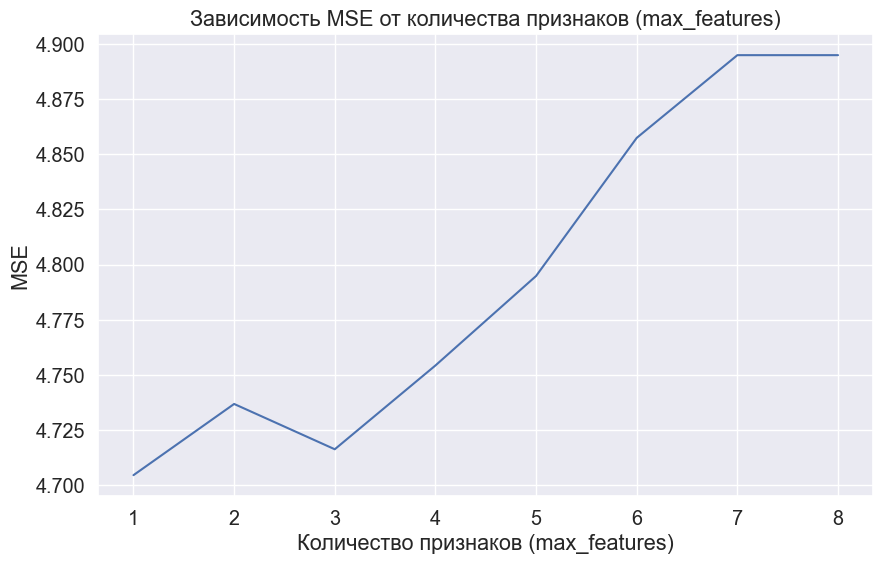

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(max_features_range, mse_scores)
plt.title('Зависимость MSE от количества признаков (max_features)')
plt.xlabel('Количество признаков (max_features)')
plt.ylabel('MSE')
plt.show()

Постройте график зависимости метрики mse на `test` и `train` в зависимости от числа признаков, использующихся при разбиении в каждой вершине.

In [147]:
max_features_range = range(1, 9)
mse_scores_test = []
mse_scores_train = []
for max_features in max_features_range:
    model = RandomForestRegressor(max_features=max_features, random_state=42)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mse_scores_test.append(MSE(y_pred_test, y_test))
    mse_scores_train.append(MSE(y_pred_train, y_train))

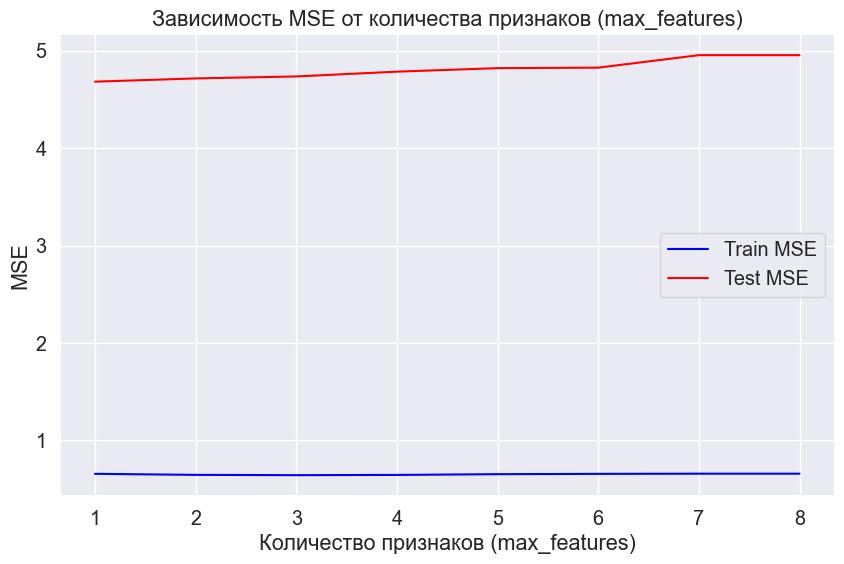

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(max_features_range, mse_scores_train, color='blue', label='Train MSE')
plt.plot(max_features_range, mse_scores_test, color='red', label='Test MSE')
plt.title('Зависимость MSE от количества признаков (max_features)')
plt.xlabel('Количество признаков (max_features)')
plt.ylabel('MSE')
plt.legend()
plt.show()

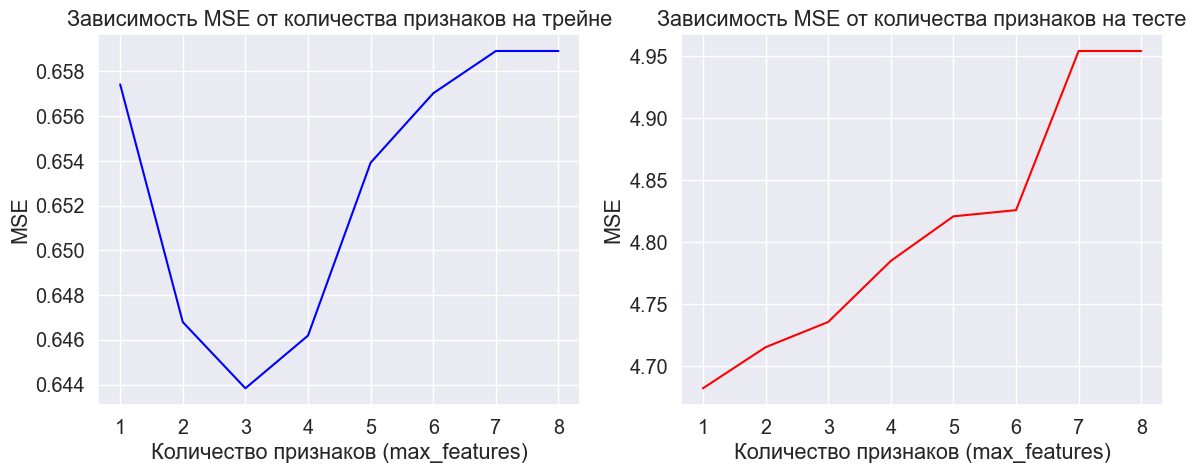

In [143]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(max_features_range, mse_scores_train, color='blue', label='Train MSE')
ax1.set_title('Зависимость MSE от количества признаков на трейне')
ax1.set_xlabel('Количество признаков (max_features)')
ax1.set_ylabel('MSE')

ax2.plot(max_features_range, mse_scores_test, color='red', label='Test MSE')
ax2.set_title('Зависимость MSE от количества признаков на тесте')
ax2.set_xlabel('Количество признаков (max_features)')
ax2.set_ylabel('MSE')

plt.tight_layout()
plt.show()

Почему график получился таким? Как зависит разнообразие деревьев от величины `n_features`?

**Ответ:** Ниже я привела отдельные графики, чтобы была видна их форма. Но намного важнее смотреть первый график с обоими обучениями сразу - становится видно, что на трейне MSE почти ноль (так как мы буквально обучились под эту выборку), а вот на тесте видим ненулевой MSE, который растёт понемногу

Зафиксируйте наилучшие гиперпараметры.

Проведите исследование скорости обучения и предсказания. 

Засеките время обучения и предсказания, например, с помощью модуля `time`.



In [163]:
best_params = {
    'max_features': 3,
    'n_estimators': 71,
    'max_depth': 8,
    'random_state': 42
}

model = RandomForestRegressor(**best_params)
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Время обучения: {training_time:.4f} секунд")

start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time
print(f"Время предсказания: {prediction_time:.4f} секунд")

Время обучения: 0.5408 секунд
Время предсказания: 0.0165 секунд


Посчитайте среднюю глубину дерева в случайном лесе. Используйте функцию `get_depth()` для отдельных деревьев леса.
Посчитайте среднее количество листьев, используя функцию `get_n_leaves()` для отдельных деревьев.



In [165]:
depths = []
n_leaves = []

for tree in model.estimators_:
    depths.append(tree.get_depth())
    n_leaves.append(tree.get_n_leaves())
    
avg_depth = sum(depths) / len(depths)
avg_n_leaves = sum(n_leaves) / len(n_leaves)

print(f"Средняя глубина деревьев: {avg_depth:.2f}")
print(f"Среднее количество листьев: {avg_n_leaves:.2f}")

Средняя глубина деревьев: 8.00
Среднее количество листьев: 176.15


Сделайте выводы. Какие деревья обычно используются в случайном лесу? Как вы предполагаете, как от этого зависит скорость обучения и предсказания?

**Ответ** Видим, что средняя глубина = максимальной, которую мы выставили в условии выше. То есть лес стремится к более глубокому разбиению, а мы этого не даём.

Исследуйте важности признаков для следующих случаев:



*   Решающее  дерево
*   Случайный лес
*   Лес из первых 5-10 деревьев случайного леса из предыдущего пункта.

Также проанализируйте качество моделей выше.

Сделайте выводы. Отличаются ли посчитанные важности? Есть ли связь важностей признаков и качества моделей? О чем говорят посчитанные важности признаков?



In [182]:
# Решающее дерево
dt = DecisionTreeRegressor(max_depth=8, random_state=42)
dt.fit(X_train, y_train)
dt_importances = dt.feature_importances_
dt_mse = MSE(y_test, dt.predict(X_test))

# Случайный лес
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_
rf_mse = MSE(y_test, rf.predict(X_test))

# Лес из первых 5-10 деревьев
model_first_trees = model.estimators_[:10]
first_trees_importances = np.mean([tree.feature_importances_ for tree in model_first_trees], axis=0)
first_trees_mse = MSE(y_test, np.mean([tree.predict(X_test) for tree in model_first_trees], axis=0))

print("Решающее дерево:")
print("Важности признаков:", dt_importances)
print("MSE:", dt_mse)

print("\nСлучайный лес:")
print("Важности признаков:", rf_importances)
print("MSE:", rf_mse)

print("\nЛес из первых 10 деревьев:")
print("Важности признаков:", first_trees_importances)
print("MSE:", first_trees_mse)

Решающее дерево:
Важности признаков: [0.01890661 0.01369367 0.03618681 0.04856728 0.21330592 0.03028449
 0.63905523]
MSE: 6.549486344806685

Случайный лес:
Важности признаков: [0.03064067 0.03516002 0.0446214  0.06011632 0.17197563 0.03949458
 0.61799137]
MSE: 4.791574464173592

Лес из первых 10 деревьев:
Важности признаков: [0.03705026 0.08031731 0.17921097 0.10578863 0.14522661 0.09272023
 0.35968599]
MSE: 4.904863095321923


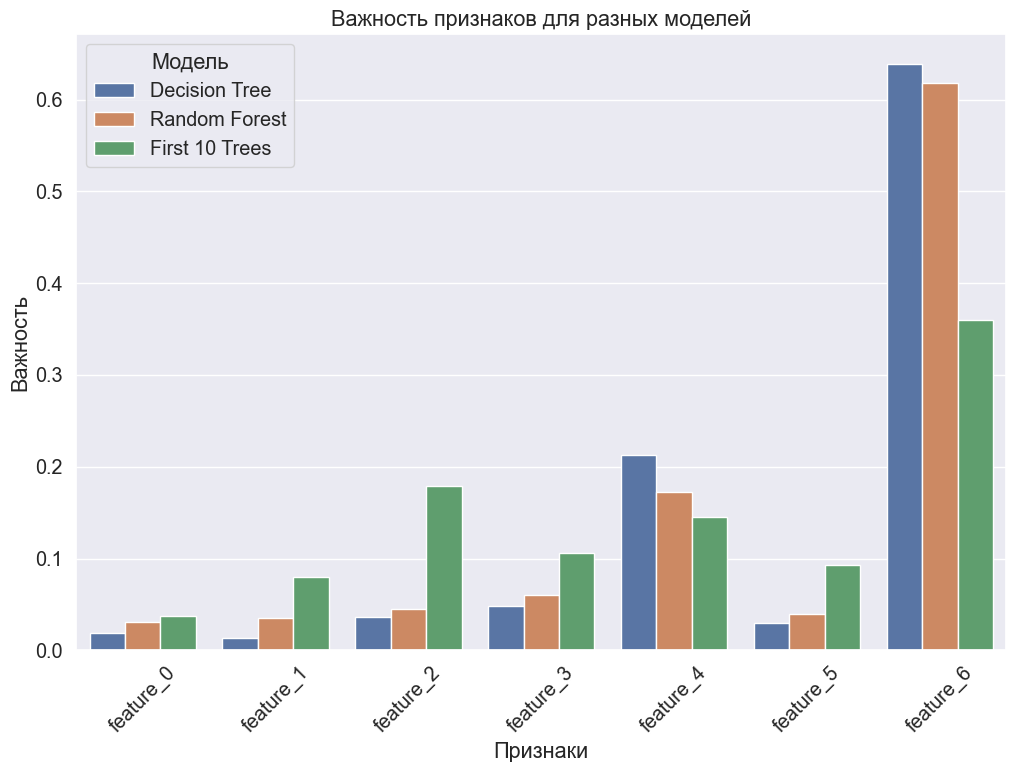

In [186]:
# визуализируем как в дз4 
feature_names = [f"feature_{i}" for i in range(X.shape[1])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Decision Tree': dt_importances,
    'Random Forest': rf_importances,
    'First 10 Trees': first_trees_importances
})

importance_df_long = importance_df.melt(
    id_vars='Feature',
    value_vars=['Decision Tree', 'Random Forest', 'First 10 Trees'],
    var_name='Model',
    value_name='Importance'
)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=importance_df_long,
    x='Feature',
    y='Importance',
    hue='Model'
)
plt.title('Важность признаков для разных моделей')
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.xticks(rotation=45)
plt.legend(title='Модель', loc='upper left')
plt.show()

**Ответ:** Можно заметить, что общий тренд на распределение важностей признаков схож между моделями. Однако, последняя модель с первыми 10 деревьями отличается сильнее всего от двух остальных - она меньше выделяет последний признак, в то же время распределяя важность между остальными признаками

### Задача 2

На лекции была получена формула bias-variance разложения для беггинга. Проведите эксперимент, в котором выясните, насколько уменьшается разброс (variance-компонента) беггинг-модели на 100 базовых моделях по отношению к одной базовой модели. Используйте данные из предыдущей задачи. Рассмотрите случайный лес и беггинг на моделях ридж-регрессии.


Для реализации данного эксперимента используйте класс беггинг-модели
`sklearn.ensemble.BaggingRegressor` , у которого используйте следующие поля:
* `base_estimator` — базовая модель;
* `max_features` — количество признаков для каждой базовой модели;
* `n_estimators` — количество базовых моделей.

Для решения задачи потребуется оценить корреляции предсказаний на тестовой выборке базовых моделей, входящих в состав беггинг-модели. Эти модели можно получить с помощью поля `estimators_` у обученной беггинг-модели. Корреляции моделей можно смотреть как корреляции векторов их предсказаний.

Насколько уменьшается разброс в каждом случае? Для каждого случая постройте также матрицу корреляций предсказаний базовых моделей и гистограмму по ним. Какую оценку коэффициента корреляции вы используете и почему?

In [215]:
def plot_func(predictions, title):
    corr_matrix = np.corrcoef(predictions)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, ax=ax1)
    ax1.set_title(f'Матрица корреляций: {title}')

    sns.histplot(corr_matrix[np.triu_indices_from(corr_matrix, k=1)], bins=30, kde=True, ax=ax2)
    ax2.set_title(f'Гистограмма корреляций: {title}')
    ax2.set_xlabel('Корреляция')
    ax2.set_ylabel('Частота')

    plt.tight_layout()
    plt.show()

In [217]:
# Случайный лес 100 базовых
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = np.array([tree.predict(X_test) for tree in rf.estimators_])
rf_variance = np.var(rf_predictions, axis=0).mean()

# Беггинг на ридж-регрессии
ridge_bagging = BaggingRegressor(
    estimator=Ridge(alpha=1.0),
    n_estimators=100,
    random_state=42
)
ridge_bagging.fit(X_train, y_train)
ridge_predictions = np.array([estimator.predict(X_test) for estimator in ridge_bagging.estimators_])
ridge_variance = np.var(ridge_predictions, axis=0).mean()

# Одна базовая модель (решающее дерево)
dt = DecisionTreeRegressor(max_depth=8, random_state=42)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_variance = np.var(dt_predictions)

print(f"Дисперсия предсказаний для одной базовой модели (решающее дерево): {dt_variance:.4f}")
print(f"Дисперсия предсказаний для случайного леса: {rf_variance:.4f}")
print(f"Дисперсия предсказаний для беггинга на ридж-регрессии: {ridge_variance:.4f}")

Дисперсия предсказаний для одной базовой модели (решающее дерево): 7.9916
Дисперсия предсказаний для случайного леса: 2.0907
Дисперсия предсказаний для беггинга на ридж-регрессии: 0.0117


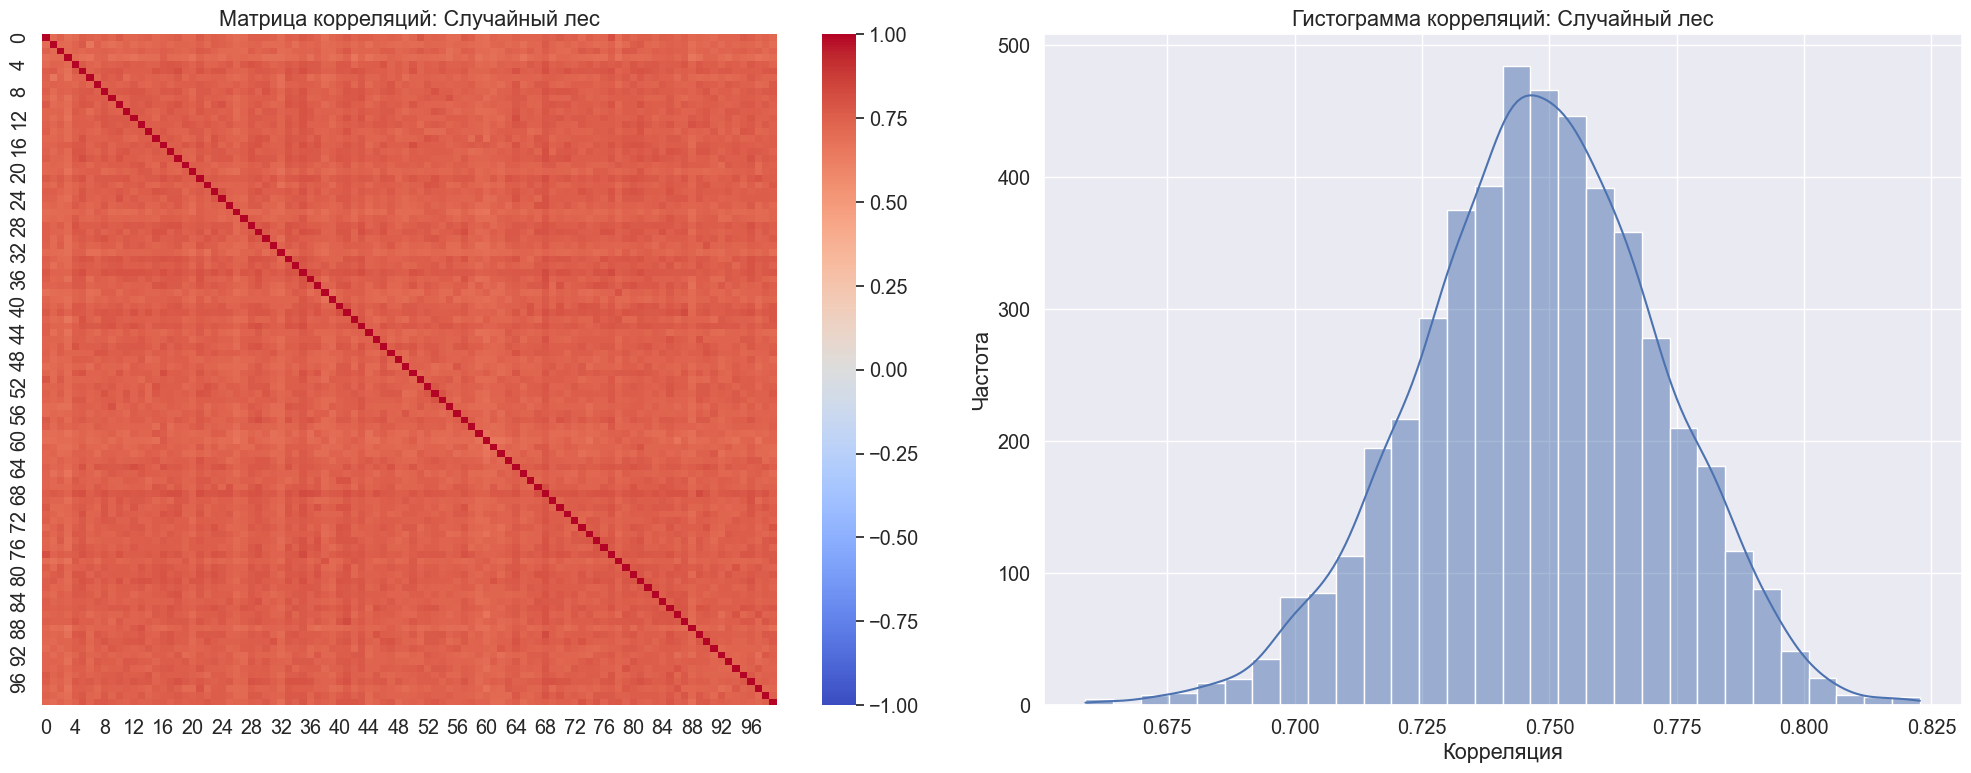

In [219]:
plot_func(rf_predictions, 'Случайный лес')

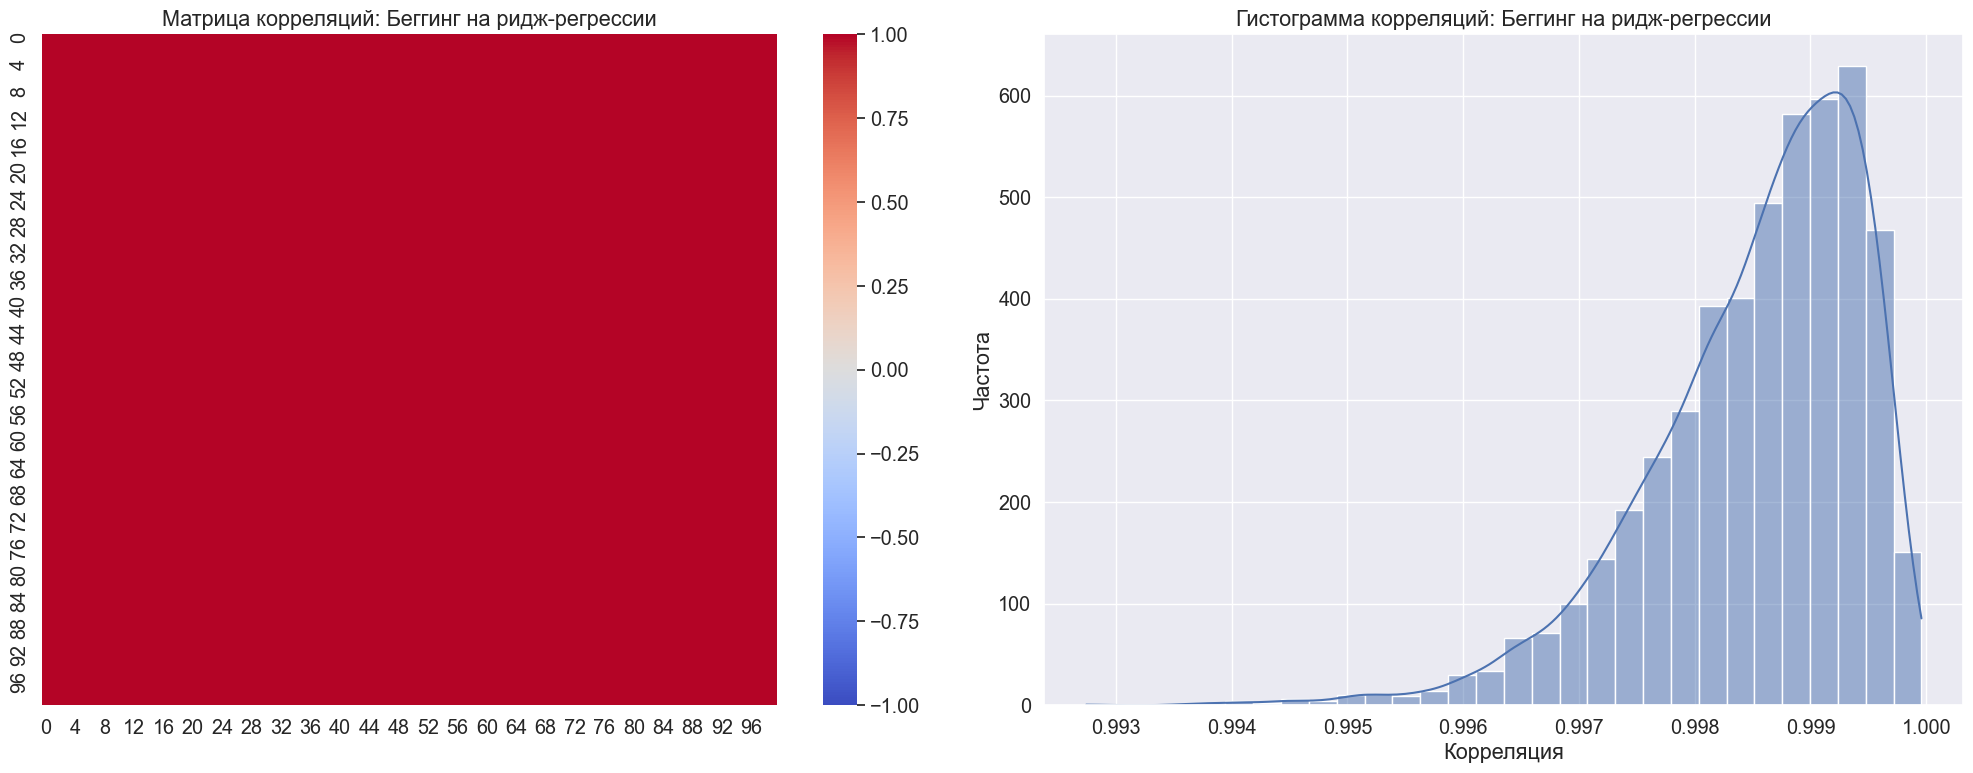

In [221]:
plot_func(ridge_predictions, 'Беггинг на ридж-регрессии')

Рассмотрим полученные результаты:

- Беггинг-модели (случайный лес и беггинг на ридж-регрессии) уменьшают дисперсию предсказаний намного лучше по сравнению с одной базовой моделью.
- Матрица корреляций для случайного леса показывает более низкие значения, чем для беггинга на ридж регрессии, так как каждое дерево обучается на случайной подвыборке данных и признаков, что делает их предсказания менее зависимыми друг от друга в случае леса.
- В случае беггинга на ридж-регрессии значения на гистограмме смещены в более высокие значения, так как предсказания базовых моделей ридж-регрессии более похожи друг на друга.